<a href="https://colab.research.google.com/github/Technocolabs100/Data-Science-20-Feb-Optimizing-Lending-Club-s-Financial-Risk/blob/main/manasa_main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
pip install -q keras

In [30]:
import keras

In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [32]:
data_filepath="/content/drive/MyDrive/accepted_2007_to_2018Q4.csv.gz"

In [33]:
df_Accepted=pd.read_csv(data_filepath)

In [34]:
df_Accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_Accepted.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,...,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,...,84664.0,62426.0,20700.0,58764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,770xx,TX,23.36,0.0,Jun-1996,660.0,664.0,1.0,37.0,NaN,8.0,0.0,7662.0,54.0,22.0,w,8456.12,8456.12,...,163804.0,44215.0,9500.0,34169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_Accepted.shape

(2260701, 151)

In [39]:
df_Accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [40]:
df_Accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [41]:
df_Accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [42]:
df_Accepted.isnull().sum().sort_values(ascending=False).head(60)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_start_date                           2249784
hardship_end_date                             2249784
payment_plan_start_date                       2249784
hardship_length                               2249784
hardship_type                                 2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
settlement_percentage                         2226455
debt_settlement_flag_date                     2226455
settlement_status                             2226455
settlement_date             

In [43]:
missing_data = df_Accepted.isnull().mean().sort_values(ascending=False)*100
missing_data

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_loan_status                           99.517097
hardship_dpd                                   99.517097
hardship_reason                                99.517097
                                                 ...    
initial_list_status                             0.001460
revol_bal                                       0.001460
hardship_flag                                   0.001460
fico_range_high                                 0.001460
id                                              0.000000
Length: 151, dtype: float64

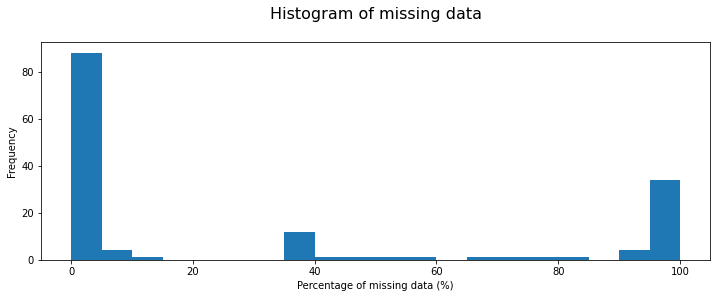

In [44]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.title('Histogram of missing data\n', fontsize=16)
plt.xlabel('Percentage of missing data (%)')
plt.ylabel('Count')

# Setting the figure up:
missing_data.plot.hist(bins=20)

In [45]:
drop_columns = sorted(list(missing_data[missing_data > 25].index))

In [46]:
drop_columns
print(len(drop_columns))

58


In [ ]:
df_Accepted.drop(labels=drop_columns, axis=1, inplace=True)

In [47]:
df_Accepted.shape

(2260701, 151)

In [48]:
Col_present = list(df_Accepted.columns)
Col_present

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [53]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc",
                      "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = []
for i in Col_present:
  if i in Important_Features:
    pass
  else:
    Features_Need_to_be_Dropped.append(i)


print(Features_Need_to_be_Dropped)

['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'desc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'

In [54]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

In [ ]:
df_Accepted.drop(labels=Features_Need_to_be_Dropped, axis=1, inplace=True)

In [56]:
df_Accepted.shape

(2260701, 77)

In [57]:
df_Accepted["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [58]:
df_Accepted = df_Accepted.loc[df_Accepted["loan_status"].isin(["Fully Paid","Charged Off"])]
df_Accepted

,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,desc,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,mths_since_last_delinq,mths_since_last_record,pub_rec,next_pymnt_d,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,NaN,debt_consolidation,190xx,PA,5.91,675.0,679.0,30.0,NaN,0.0,NaN,30.0,Individual,NaN,NaN,NaN,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,3.0,1.0,4.0,69.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,NaN,small_business,577xx,SD,16.06,715.0,719.0,6.0,NaN,0.0,NaN,NaN,Individual,NaN,NaN,NaN,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,0.0,0.0,6.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,NaN,home_improvement,605xx,IL,10.78,695.0,699.0,NaN,NaN,0.0,NaN,NaN,Joint App,71000.0,13.85,Not Verified,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,NaN,major_purchase,174xx,PA,25.37,695.0,699.0,12.0,NaN,0.0,NaN,NaN,Individual,NaN,NaN,NaN,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,2.0,1.0,3.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Fully Paid,NaN,debt_consolidation,300xx,GA,10.20,690.0,694.0,NaN,NaN,0.0,NaN,NaN,Individual,NaN,NaN,NaN,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,NaN,18000.0,60 months,9.49,377.95,B,B2,NaN,5 years,OWN,130000.0,Fully Paid,NaN,home_improvement,775xx,TX,20.59,735.0,739.0,NaN,NaN,0.0,NaN,NaN,Individual,NaN,NaN,NaN,0.0,6.0,0.0,3.0,15.0,30516.0,52.0,0.0,3.0,7061.0,41.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260690,NaN,29400.0,60 months,13.99,683.94,C,C3,Ch

In [59]:
df_Accepted.shape

(1345310, 77)

In [60]:
df_Accepted.nunique()

member_id                    0
loan_amnt                 1556
term                         2
int_rate                   654
installment              83307
                         ...  
settlement_status            3
settlement_date             89
settlement_amount        21760
settlement_percentage     2059
settlement_term             40
Length: 77, dtype: int64

In [61]:
df_Accepted.isnull().sum()

member_id                1345310
loan_amnt                      0
term                           0
int_rate                       0
installment                    0
                          ...   
settlement_status        1312034
settlement_date          1312034
settlement_amount        1312034
settlement_percentage    1312034
settlement_term          1312034
Length: 77, dtype: int64

**loan amount**

In [62]:
df_Accepted["loan_amnt"].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [63]:

df_Accepted.describe()

,member_id,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,mths_since_last_delinq,mths_since_last_record,pub_rec,mths_since_last_major_derog,annual_inc_joint,dti_joint,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,inq_fi,total_cu_tl,inq_last_12m,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,666567.000000,228555.000000,1.345310e+06,353750.000000,2.580000e+04,25797.000000,537597.000000,537598.000000,537598.000000,537598.000000,523382.000000,5.375980e+05,465016.000000,537598.000000,537598.000000,537598.000000,537545.000000,537598.000000,537597.000000,537597.000000,319020.000000,449962.000000,18629.000000,18630.000000,18630.000000,18630.000000,18630.000000,18630.000000,18302.000000,18630.000000,18630.000000,18630.000000,18630.000000,6645.000000,5754.0,5754.000000,5754.0,5754.000000,3759.000000,5754.000000,5754.000000,33276.000000,33276.000000,33276.000000
mean,NaN,1.441997e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,6.961850e+02,7.001852e+02,34.312069,70.637120,2.152760e-01,43.701165,1.173830e+05,18.896631,1.050562,2.792555,0.776366,1.742754,19.592967,3.586201e+04,71.422076,1.420885,3.005071,5537.703496,58.176372,1.093306,1.609243,2.312381,39.652617,35.804695,31557.637876,665.970209,669.970209,0.752013,1.670102,11.305368,57.195864,2.945357,12.800215,0.056683,0.087332,36.356960,3.0,147.434105,3.0,13.949426,410.696640,10995.141594,184.689314,5029.933417,47.691708,13.158132
std,NaN,8.717051e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,3.185251e+01,3.185316e+01,21.919162,26.579224,6.018647e-01,21.378476,5.978383e+04,7.722907,1.208835,2.989919,0.993202,1.685722,24.871717,4.290663e+04,22.909238,1.574845,2.701468,5471.949360,20.935438,1.586263,2.825072,2.542073,22.698164,22.428202,26885.409340,45.873196,45.873196,1.091751,1.839214,6.503775,26.478891,3.194589,8.339521,0.462691,0.429776,23.985218,0.0,128.468905,0.0,9.777414,357.512115,7474.257379,196.459790,3684.827275,7.306107,8.235592
min,NaN,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,6.250000e+02,6.290000e+02,0.000000,0.000000,0.000000e+00,0.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,540.000000,544.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,6.700000e+02,6.740000e+02,16.000000,53.000000,0.000000e+00,27.000000,8.000000e+04,13.290000,0.000000,1.000000,0.000000,1.000000,6.000000,9.605000e+03,58.000000,0.000000,1.000000,2180.000000,44.000000,0.000000,0.000000,1.000000,21.000000,17.000000,13837.000000,640.000000,644.000000,0.000000,0.000000,7.000000,37.900000,1.000000,7.000000,0.000000,0.000000,15.000000,3.0,53.267500,3.0,5.000000,147.450000,5037.307500,39.570000,2228.617500,45.000000,6.000000
50%,NaN,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,6.900000e+02,6.940000e+02,31.000000,72.000000,0.000000e+00,44.000000,1.063000e+05,18.460000,1.000000,2.000000,1.000000,1.000000,12.000000,2.406200e+04,75.000000,1.000000,2.000000,4201.000000,59.000000,1.000000,0.000000,2.000000,38.0000

**Interest Rate**

In [64]:

df_Accepted["int_rate"].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

OUTLIER DETECTION USING INTER QURTILE RANGE:

In [65]:
Q1 = np.quantile(df_Accepted["int_rate"],0.25)
Q3 = np.quantile(df_Accepted["int_rate"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)

Low_outliers : 0.39
High_outliers : 25.35
Q1 : 9.75
Q3 : 15.99
IQR : 6.24


OUTLIER DETECTION USING Z-SCORE TECHNIQUE:

Z score = (x -mean) / std. deviation 

In [66]:
data = df_Accepted["int_rate"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold = 3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i)

print('outlier in dataset is', outlier)

mean of the dataset is 13.2396
std. deviation is 4.7687
outlier in dataset is [27.99, 28.49, 28.99, 28.99, 28.49, 27.99, 28.99, 27.99, 27.99, 27.88, 28.99, 28.49, 28.49, 27.88, 27.88, 27.88, 28.49, 28.99, 27.88, 28.99, 28.49, 28.99, 27.88, 27.88, 28.49, 27.88, 27.88, 28.49, 28.49, 28.49, 27.88, 28.49, 27.88, 27.88, 28.49, 28.49, 27.88, 27.88, 27.88, 28.99, 28.49, 28.49, 28.99, 27.88, 28.49, 28.49, 27.88, 27.88, 28.99, 28.49, 27.88, 28.49, 28.99, 27.88, 27.88, 27.88, 27.88, 27.88, 27.88, 27.88, 28.49, 28.49, 27.88, 27.88, 28.49, 28.99, 27.88, 28.49, 28.99, 27.88, 28.99, 27.88, 28.49, 28.49, 27.88, 27.88, 27.88, 27.88, 27.88, 28.49, 27.88, 27.88, 27.88, 27.88, 28.99, 28.49, 27.88, 27.88, 28.99, 27.88, 27.88, 27.88, 28.99, 27.88, 27.88, 28.49, 28.99, 28.49, 28.49, 28.49, 28.49, 28.49, 27.88, 28.99, 28.49, 27.88, 28.49, 28.99, 27.88, 28.99, 28.99, 27.88, 27.88, 28.99, 27.88, 28.49, 27.88, 27.88, 28.49, 28.99, 27.88, 27.88, 28.99, 27.88, 27.88, 28.99, 27.88, 27.88, 27.88, 28.49, 27.88, 28.4

In [67]:
min(outlier)

27.79

In [68]:
df_Accepted["loan_status"][df_Accepted["int_rate"]>=27.79].value_counts()

Charged Off    4916
Fully Paid     4848
Name: loan_status, dtype: int64

In [69]:

outlier_interest_rate = df_Accepted[df_Accepted["int_rate"]>=27.79].index

In [70]:
outlier_interest_rate_Remove = []
for i in outlier_interest_rate:
  outlier_interest_rate_Remove.append(i)

print(outlier_interest_rate_Remove)
print(len(outlier_interest_rate_Remove))

[809, 878, 2668, 2746, 4029, 4807, 5747, 6680, 6961, 7090, 7975, 9879, 11111, 11804, 13348, 14532, 15004, 15046, 15371, 15374, 16493, 16634, 16862, 18050, 19480, 21144, 21170, 21495, 22271, 23121, 24063, 25548, 25629, 25949, 26276, 27260, 27810, 28096, 28224, 28635, 30254, 31425, 31627, 32405, 32460, 33589, 34356, 34411, 35228, 35256, 35731, 36350, 36598, 36674, 36871, 37395, 38881, 39271, 39871, 40645, 41075, 41290, 41739, 41920, 42027, 44216, 44630, 45620, 45977, 46433, 46531, 47530, 47740, 47829, 47986, 49499, 49735, 50667, 51036, 51427, 53269, 55114, 55651, 56560, 56876, 57138, 58383, 58640, 58649, 59103, 59832, 60264, 60330, 60340, 61092, 61434, 62497, 64171, 65195, 65937, 66223, 67498, 68191, 69893, 69903, 73448, 74255, 74320, 75901, 78064, 78954, 83832, 84256, 84851, 86145, 86589, 87792, 89833, 90824, 91955, 92648, 95035, 95171, 97708, 97963, 99449, 99954, 100679, 100863, 101010, 102780, 103030, 103190, 103363, 105017, 105178, 105779, 106222, 108315, 108703, 109618, 110593, 1108

In [71]:
df_Accepted.drop(outlier_interest_rate_Remove, axis=0, inplace=True)

In [72]:

df_Accepted.shape

(1335546, 77)


ANNUAL INCOME

In [73]:
df_Accepted["annual_inc"].describe()

count    1.335546e+06
mean     7.627045e+04
std      7.007478e+04
min      0.000000e+00
25%      4.576000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [74]:
Q1 = np.quantile(df_Accepted["annual_inc"],0.25)
Q3 = np.quantile(df_Accepted["annual_inc"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 45760.0
Q3 : 90000.0
IQR : 44240.0
Low_outliers : -20600.0
High_outliers : 156360.0


OUTLIER DETECTION USING Z-SCORE TECHNIQUE:

Z score = (x -mean) / std. deviation

In [75]:
data = df_Accepted["annual_inc"]
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)

threshold1 = -3
threshold2 =  3
outlier_annual_income = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier_annual_income.append(i)

print("outliers in the dataset :", outlier_annual_income)

mean of the dataset is 76270.4529
std. deviation is 70074.7519
outliers in the dataset : [297000.0, 300000.0, 450000.0, 300000.0, 415000.0, 650000.0, 300000.0, 300000.0, 295000.0, 296000.0, 350000.0, 450000.0, 370000.0, 300000.0, 400000.0, 525000.0, 425000.0, 333600.0, 675000.0, 300000.0, 370000.0, 290000.0, 520000.0, 350000.0, 450000.0, 300000.0, 400000.0, 600000.0, 300000.0, 350000.0, 350000.0, 300000.0, 325000.0, 550000.0, 300000.0, 300000.0, 430000.0, 600000.0, 369000.0, 750000.0, 305000.0, 374000.0, 1400000.0, 400000.0, 300000.0, 424000.0, 3964280.0, 450000.0, 400000.0, 300000.0, 1000000.0, 400000.0, 300000.0, 550000.0, 320000.0, 350000.0, 300000.0, 360000.0, 594000.0, 300000.0, 325000.0, 300000.0, 400000.0, 396000.0, 300000.0, 400000.0, 315000.0, 350000.0, 475000.0, 500000.0, 300000.0, 306000.0, 2300000.0, 300000.0, 385000.0, 450000.0, 400000.0, 400000.0, 300000.0, 550000.0, 305000.0, 425000.0, 400000.0, 400000.0, 370000.0, 350000.0, 399000.0, 320000.0, 300000.0, 305000.0, 300000

In [76]:
print(min(outlier_annual_income))
print(len(outlier_annual_income))

286800.0
9964


In [77]:
Outlier_Annual_inc = (df_Accepted[df_Accepted["annual_inc"]>=286800.0].index)
Outlier_Annual_inc

Int64Index([    213,     557,     651,    1089,    1122,    1482,    1487,
               1694,    2028,    2069,
            ...
            2259257, 2259331, 2259556, 2259605, 2259800, 2260011, 2260306,
            2260340, 2260416, 2260582],
           dtype='int64', length=9964)

In [78]:
Outlier_Annual_inc_Remove = []

for i in Outlier_Annual_inc:
  Outlier_Annual_inc_Remove.append(i)

print(Outlier_Annual_inc_Remove)

[213, 557, 651, 1089, 1122, 1482, 1487, 1694, 2028, 2069, 2145, 2224, 2277, 2303, 2329, 2928, 2982, 3072, 3386, 3561, 3577, 3678, 3709, 3718, 3764, 4185, 4672, 4723, 4899, 5020, 5110, 5290, 5308, 5331, 5363, 5614, 5745, 5828, 6386, 6402, 6508, 6704, 6975, 7082, 7173, 7199, 7239, 7421, 7431, 7595, 7666, 7686, 7782, 8055, 8196, 8207, 8243, 8350, 8420, 8427, 8560, 8582, 8607, 8660, 8834, 9018, 9233, 9236, 9390, 9452, 9727, 9766, 10404, 10604, 10797, 10836, 11100, 11128, 11139, 11517, 11842, 11843, 11970, 12004, 12097, 12164, 12224, 12484, 12494, 12504, 13254, 13303, 13344, 13670, 13736, 13751, 13823, 14158, 14250, 14312, 14330, 14977, 14987, 15048, 15062, 15267, 15487, 15707, 15722, 15732, 15800, 15859, 15920, 16027, 16256, 16486, 16729, 16787, 16792, 16795, 16810, 17311, 17375, 17475, 17488, 17619, 17723, 17736, 17967, 18060, 18481, 18513, 18535, 18598, 18618, 18991, 19074, 19142, 19227, 19238, 19410, 19500, 19637, 19986, 20151, 20159, 20225, 20370, 20546, 20614, 20807, 20857, 20872, 214

In [79]:
df_Accepted.shape

(1335546, 77)

In [80]:
df_Accepted.drop(Outlier_Annual_inc_Remove, axis=0, inplace=True)

Debt-to-income
DTI= (Total of Monthly Debt Payments / Gross Monthly Income)

In [81]:
df_Accepted["dti"].isnull().sum()

361

In [82]:
df_Accepted["loan_status"][df_Accepted["dti"].isnull()].value_counts()

Fully Paid     295
Charged Off     66
Name: loan_status, dtype: int64

In [83]:
df_Accepted.dropna(subset=["dti"], axis=0, inplace=True)

In [84]:
df_Accepted.shape

(1325221, 77)


OUTLIER DETECTION USING INTER QURTILE RANGE

In [89]:
Q1 = np.quantile(df_Accepted["dti"],0.25)
Q3 = np.quantile(df_Accepted["dti"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,2))
print("High_outliers :", round(High_outliers,2))

Q1 : 11.86
Q3 : 24.06
IQR : 12.2
Low_outliers : -6.44
High_outliers : 42.36


In [86]:
data = df_Accepted["dti"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier.append(i)

print('outlier in the dataset:', outlier)
print('DTI threshold:', min(outlier))
print('Length of the outlier:', len(outlier))

mean of the dataset is 18.3107
std. deviation is 11.0569
outlier in the dataset: [83.64, 999.0, 83.4, 137.4, 89.83, 52.8, 58.54, 59.18, 59.26, 100.09, 68.41, 52.45, 90.0, 57.14, 69.35, 54.1, 120.66, 54.36, 54.19, 61.21, 67.5, 380.53, 59.26, 672.52, 63.64, 125.25, 64.99, 60.08, 71.4, 68.3, 104.0, 54.43, 58.43, 63.0, 112.2, 78.64, 60.99, 60.2, 93.0, 531.33, 57.49, 359.69, 66.61, 55.52, 59.83, 51.98, 53.15, 110.9, 72.67, 65.24, 55.87, 54.22, 99.18, 108.71, 79.59, 69.47, 51.99, 53.4, 117.71, 86.31, 55.11, 53.23, 56.46, 55.28, 549.53, 92.29, 55.62, 56.0, 61.46, 251.6, 65.84, 52.81, 94.12, 52.28, 61.4, 64.82, 62.85, 288.08, 60.06, 54.4, 65.22, 65.73, 112.32, 65.8, 54.2, 62.83, 56.62, 59.59, 209.1, 97.03, 57.84, 460.21, 67.68, 55.4, 70.28, 999.0, 55.78, 75.87, 75.54, 71.63, 58.4, 116.21, 51.97, 131.35, 59.97, 58.95, 54.98, 54.22, 63.39, 62.66, 106.03, 70.54, 57.31, 75.4, 75.25, 57.68, 62.16, 131.1, 129.11, 77.27, 56.62, 90.29, 61.97, 82.27, 142.16, 60.33, 94.29, 62.92, 71.59, 67.35, 55.22, 77

In [90]:
df_Accepted["loan_status"][df_Accepted["dti"]> round(High_outliers,2)].value_counts()

Fully Paid     3739
Charged Off    1515
Name: loan_status, dtype: int64

In [91]:
DTI_Outliers = list(df_Accepted["dti"][df_Accepted["dti"]>42.36].index)
print(len(DTI_Outliers))

5254


In [92]:
df_Accepted.shape

(1325221, 77)

In [93]:
df_Accepted["dti"].describe()

count    1.325221e+06
mean     1.831072e+01
std      1.105686e+01
min     -1.000000e+00
25%      1.186000e+01
50%      1.765000e+01
75%      2.406000e+01
max      9.990000e+02
Name: dti, dtype: float64


**Debt-To-Income Ratio Risk**:

In [94]:
df_Accepted["loan_status"][df_Accepted["dti"]>35].value_counts() # Dataset{Fully Paid:Charged Off} = {80:20}

Fully Paid     23836
Charged Off    10401
Name: loan_status, dtype: int64

In [95]:

df_Accepted.describe(include=["O"])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,loan_status,desc,purpose,zip_code,addr_state,next_pymnt_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag_date,settlement_status,settlement_date
count,1325221,1325221,1325221,1240650,1247734,1325221,1325221,122899,1325221,1325220,1325221,0,1325221,24302,17489,5585,5585,5585,5585,5585,5585,5585,32650,32650,32650
unique,2,7,35,374623,11,6,2,121385,14,943,51,0,2,3,568,1,9,2,26,25,25,5,83,3,89
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Fully Paid,,debt_consolidation,945xx,CA,NaN,Individual,Not Verified,Aug-2006,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Sep-2017,Dec-2017,Oct-2017,Late (16-30 days),Jan-2019,COMPLETE,Jan-2019
freq,1010497,389755,84903,21113,434972,654313,1062894,234,769155,14748,193383,NaN,1300722,14193,192,5585,1571,3685,1457,1075,1041,2515,2399,14339,1582


 **Installment**

In [96]:
df_Accepted["installment"].isnull().any()

False

In [97]:

df_Accepted["installment"].describe()

count    1.325221e+06
mean     4.336571e+02
std      2.579906e+02
min      4.930000e+00
25%      2.469900e+02
50%      3.721300e+02
75%      5.737000e+02
max      1.628080e+03
Name: installment, dtype: float64

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [98]:
Q1 = np.quantile(df_Accepted["installment"],0.25)
Q3 = np.quantile(df_Accepted["installment"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", round(IQR,3))
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 246.99
Q3 : 573.7
IQR : 326.71
Low_outliers : -243.075
High_outliers : 1063.765


In [99]:
data = df_Accepted["installment"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outliers = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outliers.append(i)

#print('outlier in the dataset:', outliers)
print('Installment threshold:', min(outliers))     
print('No.of the outliers:', len(outliers))

mean of the dataset is 433.6571
std. deviation is 257.9905
Installment threshold: 1207.66
No.of the outliers: 13890


In [100]:
df_Accepted["loan_status"][df_Accepted["installment"]>=min(outliers)].value_counts()

Fully Paid     10239
Charged Off     3651
Name: loan_status, dtype: int64

In [101]:
Outliers_Installment = df_Accepted[df_Accepted["installment"]>=min(outliers)].index
len(Outliers_Installment)

13890

In [102]:
df_Accepted.shape

(1325221, 77)

In [103]:
df_Accepted.drop(labels=Outliers_Installment, axis=0, inplace=True)

.**FICO SCORE(RISK SCORE):**

In [104]:
df_Accepted["Risk_Score"] = (df_Accepted['fico_range_low'] + df_Accepted['fico_range_high'])/2

In [105]:

df_Accepted.shape

(1311331, 78)

In [106]:
df_Accepted["Risk_Score"].describe()

count    1.311331e+06
mean     6.981962e+02
std      3.185905e+01
min      6.270000e+02
25%      6.720000e+02
50%      6.920000e+02
75%      7.120000e+02
max      8.475000e+02
Name: Risk_Score, dtype: float64

In [107]:
df_Accepted["loan_status"][df_Accepted["Risk_Score"]>627][df_Accepted["Risk_Score"]<695].value_counts()

Fully Paid     551667
Charged Off    171105
Name: loan_status, dtype: int64

**public derogatory**

In [109]:
df_Accepted["loan_status"].value_counts()

Fully Paid     1052655
Charged Off     258676
Name: loan_status, dtype: int64

In [110]:
df_Accepted["pub_rec"].describe()

count    1.311331e+06
mean     2.149579e-01
std      5.993538e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.600000e+01
Name: pub_rec, dtype: float64

In [111]:
pd.crosstab(df_Accepted["pub_rec"],df_Accepted["loan_status"], normalize="columns", margins=True)

loan_status,Charged Off,Fully Paid,All
pub_rec,,,
0.0,0.807091,8.360745e-01,8.303571e-01
1.0,0.160796,1.377412e-01,1.422890e-01
2.0,0.021405,1.723452e-02,1.805723e-02
3.0,0.006212,5.290432e-03,5.472303e-03
4.0,0.002370,1.814460e-03,1.923999e-03
5.0,0.001028,8.967800e-04,9.227266e-04
6.0,0.000530,4.303404e-04,4.499245e-04
7.0,0.000220,2.042455e-04,2.074228e-04
8.0,0.000101,1.168474e-04,1.136250e-04


In [112]:
df_Accepted["loan_status"][df_Accepted["pub_rec"]>3].value_counts()

Fully Paid     3852
Charged Off    1163
Name: loan_status, dtype: int64

In [113]:
pd.crosstab(df_Accepted["loan_status"],[df_Accepted["pub_rec"]>3], normalize="index",margins=True)

pub_rec,False,True
loan_status,,
Charged Off,0.995504,0.004496
Fully Paid,0.996341,0.003659
All,0.996176,0.003824


In [114]:
Remove_Derogatory = df_Accepted[df_Accepted["pub_rec"]>=3].index

In [115]:
df_Accepted.shape

(1311331, 78)

CATEGORICAL VARIABLE

In [120]:
df_Accepted.dtypes

member_id                float64
loan_amnt                float64
term                      object
int_rate                 float64
installment              float64
                          ...   
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Risk_Score               float64
Length: 78, dtype: object

In [121]:
df_Accepted.isnull().sum()

member_id                1311331
loan_amnt                      0
term                           0
int_rate                       0
installment                    0
                          ...   
settlement_date          1279102
settlement_amount        1279102
settlement_percentage    1279102
settlement_term          1279102
Risk_Score                     0
Length: 78, dtype: int64

Employment Title

In [122]:
df_Accepted["emp_title"].isnull().sum()

84046

In [123]:
print(df_Accepted["emp_title"].unique())
print(len(df_Accepted["emp_title"].unique()))

['leadman' 'Engineer' 'truck driver' ... 'personal investor'
 'Sr. Photo Producer' 'Exec Dir Internal Audit']
371679


In [124]:
df_Accepted["emp_title"].value_counts().sort_values(ascending=False).head(10)

Teacher             20954
Manager             18962
Owner                9794
Registered Nurse     8560
RN                   8328
Supervisor           8125
Driver               7400
Sales                7253
Project Manager      6239
Office Manager       5445
Name: emp_title, dtype: int64

In [125]:
df_Accepted["loan_status"][df_Accepted["emp_title"].isnull()].value_counts()

Fully Paid     62199
Charged Off    21847
Name: loan_status, dtype: int64

In [126]:
df_Accepted["loan_status"][df_Accepted["emp_length"].isnull()].value_counts()

Fully Paid     56541
Charged Off    20590
Name: loan_status, dtype: int64

In [127]:

df_Accepted["loan_status"][df_Accepted["emp_title"].isnull()][df_Accepted["emp_length"].isnull()].value_counts()

Fully Paid     56106
Charged Off    20448
Name: loan_status, dtype: int64

In [128]:
df_Accepted["emp_title"].fillna("Others", inplace=True)

In [129]:
df_Accepted["emp_title"].isnull().any()

False

Employment Length

In [130]:
df_Accepted['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [131]:
df_Accepted['emp_length'].replace(to_replace=['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years', '2 years', '5 years', '9 years', '< 1 year', '1 year'], value=[10,3,4,6,7,8,2,5,9,0,1], inplace=True)

In [132]:

df_Accepted['emp_length'].value_counts()

10.0    429533
2.0     118817
0.0     105582
3.0     104946
1.0      86455
5.0      82013
4.0      78513
6.0      61193
8.0      59239
7.0      58256
9.0      49653
Name: emp_length, dtype: int64

In [133]:
df_Accepted['emp_length'].isnull().sum()

77131

In [134]:
df_Accepted["loan_status"][df_Accepted['emp_length'].isnull()].value_counts()

Fully Paid     56541
Charged Off    20590
Name: loan_status, dtype: int64

In [135]:
df_Accepted['emp_length'].mean()

5.9586071949440935

In [136]:
df_Accepted['emp_length'].fillna(6, inplace=True)

In [137]:
df_Accepted['emp_length'].unique()

array([10.,  3.,  4.,  6.,  7.,  8.,  2.,  5.,  9.,  0.,  1.])

In [138]:
pd.crosstab(df_Accepted["emp_length"],[df_Accepted["loan_status"]])

loan_status,Charged Off,Fully Paid
emp_length,,
0.0,21425,84157
1.0,17540,68915
2.0,23226,95591
3.0,20659,84287
4.0,15276,63237
5.0,15839,66174
6.0,32285,106039
7.0,11273,46983
8.0,11668,47571


Loan Term

In [139]:
df_Accepted["term"].isnull().sum()

0

In [140]:
df_Accepted["term"].value_counts()

 36 months    996613
 60 months    314718
Name: term, dtype: int64

In [141]:
df_Accepted["term"] = [x.strip(" months") for x in df_Accepted["term"]]

In [142]:
df_Accepted["term"] = df_Accepted["term"].astype("int", errors ="raise")

In [143]:
pd.crosstab(df_Accepted["term"], df_Accepted["loan_status"])

loan_status,Charged Off,Fully Paid
term,,
36,157701,838912
60,100975,213743


In [144]:
X = df_Accepted['loan_status'][df_Accepted['term'] == 36].value_counts()

Term36M_Defaulters = round(X[1] / (X[0]+X[1]), 2)
Term36M_Defaulters

0.16

In [145]:
X = df_Accepted['loan_status'][df_Accepted['term'] == 60].value_counts()

Term60M_Defaulters = round(X[1] / (X[0]+X[1]), 2)
Term60M_Defaulters

0.32

Grade of the Customers

In [146]:
df_Accepted.groupby(["grade"])["int_rate"].mean()

grade
A     7.114897
B    10.682282
C    14.011768
D    17.716394
E    21.123963
F    23.976524
G    25.685059
Name: int_rate, dtype: float64

In [147]:
X1 = df_Accepted.groupby(["grade"])["int_rate"].mean().index
Y1 = df_Accepted.groupby(["grade"])["int_rate"].mean().values

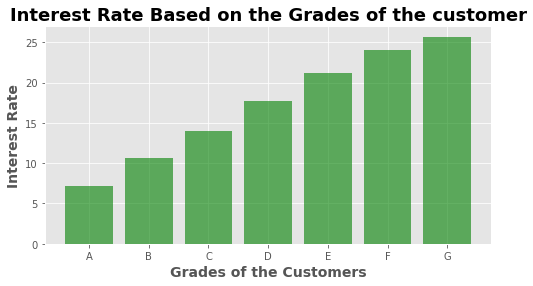

In [148]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(8,4)) #set the size that you'd like (width, height)

plt.bar(X1, Y1, color='green', alpha=0.60)
plt.title('Interest Rate Based on the Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

Sub Grade of the Customers

In [149]:
df_Accepted.groupby(["sub_grade"])["int_rate"].mean()

sub_grade
A1     5.539081
A2     6.521240
A3     7.120367
A4     7.514277
A5     8.201982
B1     8.905538
B2     9.908262
B3    10.751715
B4    11.496015
B5    12.011283
C1    12.756902
C2    13.432877
C3    14.013442
C4    14.704548
C5    15.545064
D1    16.378880
D2    17.261553
D3    17.950306
D4    18.577138
D5    19.374306
E1    19.787516
E2    20.454485
E3    21.170931
E4    22.069412
E5    23.202538
F1    22.990247
F2    23.699941
F3    24.382289
F4    24.943348
F5    25.341500
G1    25.768958
G2    25.830513
G3    25.429834
G4    25.326736
G5    25.613122
Name: int_rate, dtype: float64

In [150]:
X2 = df_Accepted.groupby(["sub_grade"])["int_rate"].mean().index
Y2 = df_Accepted.groupby(["sub_grade"])["int_rate"].mean().values

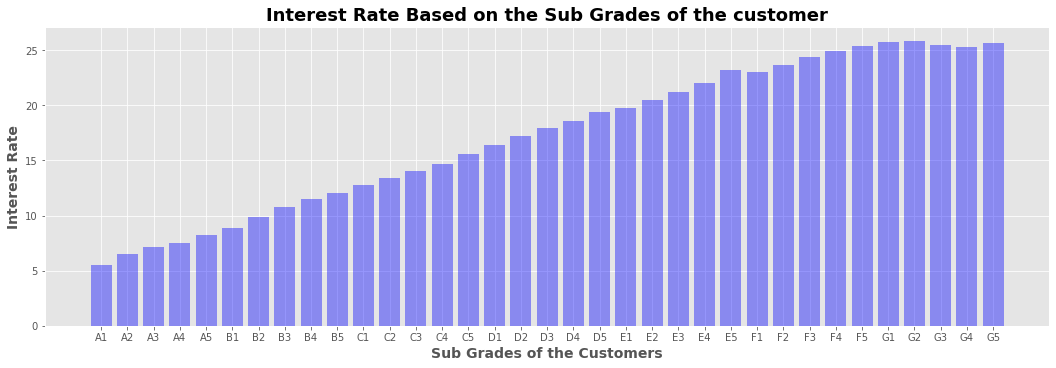

In [151]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(18,5.5)) #set the size that you'd like (width, height)

plt.bar(X2, Y2, color='blue', alpha=0.40)
plt.title('Interest Rate Based on the Sub Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Sub Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

HOME OWNERSHIP

In [152]:
df_Accepted["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [153]:
df_Accepted["home_ownership"].value_counts()

MORTGAGE    645685
RENT        524223
OWN         140961
ANY            272
OTHER          142
NONE            48
Name: home_ownership, dtype: int64

In [154]:
df_Accepted["home_ownership"].replace(['ANY', 'NONE', 'OTHER'], "OTHERS", inplace=True)

In [155]:
df_Accepted["home_ownership"].value_counts()

MORTGAGE    645685
RENT        524223
OWN         140961
OTHERS         462
Name: home_ownership, dtype: int64

In [156]:
df_Accepted[df_Accepted["home_ownership"] == "OTHERS"].index

Int64Index([  26480,  203353,  492111,  553622,  574868,  591301,  607073,
             619848,  773138,  784334,
            ...
            2179759, 2179770, 2180228, 2180776, 2181225, 2206113, 2209498,
            2237261, 2237397, 2258360],
           dtype='int64', length=462)

In [157]:
df_Accepted["loan_status"][df_Accepted["home_ownership"]=="OTHERS"].value_counts()

Fully Paid     377
Charged Off     85
Name: loan_status, dtype: int64

In [158]:
df_Accepted["home_ownership"].value_counts()

MORTGAGE    645685
RENT        524223
OWN         140961
OTHERS         462
Name: home_ownership, dtype: int64

In [159]:
X1 = df_Accepted["home_ownership"].value_counts().index
Y1 = df_Accepted["home_ownership"].value_counts().values
print(X1)
print(Y1)

Index(['MORTGAGE', 'RENT', 'OWN', 'OTHERS'], dtype='object')
[645685 524223 140961    462]


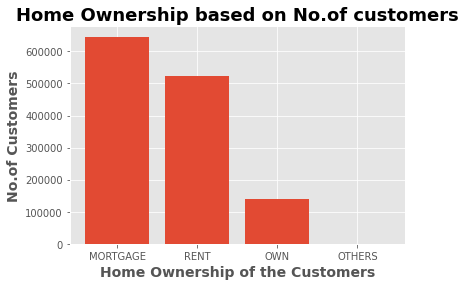

In [160]:
plt.bar(X1, Y1)
plt.title('Home Ownership based on No.of customers',fontsize=18, fontweight='bold')
plt.xlabel("Home Ownership of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=14.0, fontweight='bold')
plt.show()

In [161]:
pd.crosstab(df_Accepted["home_ownership"], df_Accepted["loan_status"])

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,109807,535878
OTHERS,85,377
OWN,28679,112282
RENT,120105,404118


In [162]:
A = pd.crosstab(df_Accepted["grade"],[df_Accepted["home_ownership"], df_Accepted["loan_status"]], values=df_Accepted["int_rate"], aggfunc='mean')
A

home_ownership    MORTGAGE             ...        RENT           
loan_status    Charged Off Fully Paid  ... Charged Off Fully Paid
grade                                  ...                       
A                 7.364687   7.047235  ...    7.441851   7.202605
B                10.763493  10.626854  ...   10.838023  10.728379
C                14.108647  14.022020  ...   14.043680  13.973929
D                17.771119  17.700751  ...   17.775331  17.659807
E                21.108948  21.113877  ...   21.210330  21.012326
F                24.066477  23.832105  ...   24.165929  23.837435
G                25.792401  25.477924  ...   25.895593  25.528243

[7 rows x 8 columns]

In [164]:
df_Accepted[["purpose","zip_code","addr_state", "application_type"]]

,purpose,zip_code,addr_state,application_type
0,debt_consolidation,190xx,PA,Individual
1,small_business,577xx,SD,Individual
2,home_improvement,605xx,IL,Joint App
4,major_purchase,174xx,PA,Individual
5,debt_consolidation,300xx,GA,Individual
...,...,...,...,...
2260688,home_improvement,775xx,TX,Individual
2260690,debt_consolidation,900xx,CA,Individual
2260691,home_improvement,863xx,AZ,Individual
2260692,medical,284xx,NC,Individual


In [165]:
df_Accepted["purpose"].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [166]:
df_Accepted["purpose"].value_counts().sort_values(ascending=False)

debt_consolidation    760153
credit_card           290241
home_improvement       84076
other                  75641
major_purchase         28544
medical                15270
small_business         14441
car                    14407
moving                  9272
vacation                8979
house                   6800
wedding                 2274
renewable_energy         908
educational              325
Name: purpose, dtype: int64

In [167]:
pd.crosstab(df_Accepted["purpose"], df_Accepted["loan_status"].sort_values(ascending=False))

loan_status,Charged Off,Fully Paid
purpose,,
car,2088,12319
credit_card,48909,241332
debt_consolidation,158737,601416
educational,56,269
home_improvement,14752,69324
house,1453,5347
major_purchase,5196,23348
medical,3290,11980
moving,2154,7118


In [168]:
df_Accepted["zip_code"].describe()

count     1311330
unique        942
top         945xx
freq        14507
Name: zip_code, dtype: object

In [169]:
df_Accepted["addr_state"].describe()

count     1311331
unique         51
top            CA
freq       191010
Name: addr_state, dtype: object

In [170]:
df_Accepted.drop(labels=["purpose","zip_code","addr_state", "application_type"], axis=1, inplace=True)

In [171]:
df_Accepted['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [172]:
df_Accepted[df_Accepted['grade'] == 'A'].describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,230963.0,13622.958115,7757.382585,500.00,7750.0000,12000.000,19200.0000,40000.00
term,230963.0,36.641557,3.871155,36.00,36.0000,36.000,36.0000,60.00
int_rate,230963.0,7.114897,1.000419,5.31,6.4900,7.260,7.8900,9.63
installment,230963.0,415.448782,236.884301,14.77,234.6500,366.370,566.2700,1205.90
emp_length,230963.0,6.027056,3.592785,0.00,3.0000,6.000,10.0000,10.00
annual_inc,230963.0,83858.315989,43352.449391,20.00,53000.0000,75000.000,102000.0000,286400.00
dti,230963.0,15.697860,8.959479,0.00,10.0000,15.070,20.8000,999.00
fico_range_low,230963.0,727.410516,36.773261,660.00,700.0000,720.000,750.0000,845.00
fico_range_high,230963.0,731.411105,36.775152,664.00,704.0000,724.000,754.0000,850.00


In [173]:
df_Accepted['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'F4', 'G4',
       'G3', 'G5'], dtype=object)

In [174]:
import matplotlib.ticker as mticker

def plot_var(col_name, full_name, df=df_Accepted, continuous=True, rotation=0, alignment='center'):
    """
    
    """
    
    # Set up figure space:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
    sn.set(palette='bright')
    
    # Set the font options for the x/y axes labels:
    #font.set_style('italic')
    
    # Plot distribution of the variable without showing charge off rate
    if continuous:
        # Show a histogram to visualise variable
        sn.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1, bins=30)
    else:
        x_labels = df[col_name].sort_values().unique()
        sn.countplot(x=df[col_name], order=sorted(df[col_name].unique()), ax=ax1).set_xticklabels(x_labels, rotation=rotation, horizontalalignment=alignment)
    
    # Formatting the x labels
    ax1.set_xlabel(full_name)
    
    # Formatting the y labels
    y_labels_1 = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
    ax1.yaxis.set_major_locator(mticker.FixedLocator(ax1.get_yticks().tolist()))
    ax1.set_yticklabels(y_labels_1)
    ax1.set_ylabel('Count')
    # Formatting the title
    ax1.set_title(full_name+"\n", fontweight='bold')

    # Plot distribution of variable split by loan status 
    if continuous:
        sn.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('Loan status')
        ax2.set_title(full_name + ' by loan status'+"\n", fontweight='bold')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sn.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
        
        # Formatting the x-axis
        ax2.set_xticklabels(charge_off_rates.index,rotation=rotation, horizontalalignment=alignment)
        
        # Formatting the y-axis
        y_labels_2 = ['{:,.0f}'.format(x) + '%' for x in ax2.get_yticks()*100]
        ax2.yaxis.set_major_locator(mticker.FixedLocator(ax2.get_yticks().tolist()))
        ax2.set_yticklabels(y_labels_2)
        ax2.set_ylabel('Proportion of loans charged off')

        # Formatting the title 
        ax2.set_title('Charge off rate by ' + full_name+"\n", fontweight='bold')
    
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

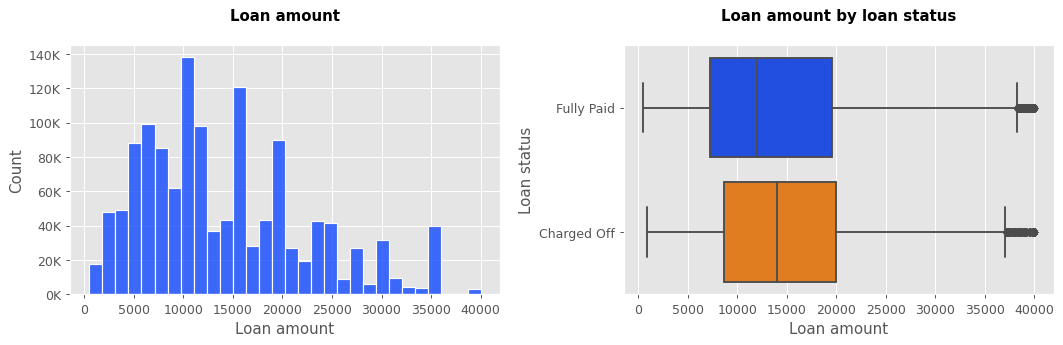

In [175]:
plot_var('loan_amnt', 'Loan amount')

In [177]:
rejected_filepath="/content/drive/MyDrive/rejected_2007_to_2018Q4.csv.gz"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [184]:
df_reject=pd.read_csv(rejected_filepath)

In [185]:
df_reject.shape

(27648741, 9)

In [189]:
df_reject.drop(labels=['Application Date', 'Loan Title', 'Zip Code', 'State', 'Policy Code'], axis=1, inplace=True)

In [190]:
df_reject.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
0,1000.0,693.0,10%,4 years
1,1000.0,703.0,10%,< 1 year
2,11000.0,715.0,10%,1 year
3,6000.0,698.0,38.64%,< 1 year
4,1500.0,509.0,9.43%,< 1 year


In [191]:
df_reject.tail()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
27648736,10000.0,590.0,41.26%,< 1 year
27648737,10000.0,NaN,1.48%,5 years
27648738,1200.0,686.0,10.26%,< 1 year
27648739,25000.0,NaN,17.71%,< 1 year
27648740,15000.0,684.0,10.58%,< 1 year


In [192]:
df_reject.isnull().sum()

Amount Requested               0
Risk_Score              18497630
Debt-To-Income Ratio           0
Employment Length         951355
dtype: int64

In [194]:
df_reject.columns

Index(['Amount Requested', 'Risk_Score', 'Debt-To-Income Ratio',
       'Employment Length'],
      dtype='object')

In [195]:
df_reject.isnull().any()

Amount Requested        False
Risk_Score               True
Debt-To-Income Ratio    False
Employment Length        True
dtype: bool

In [196]:
df_reject.shape

(27648741, 4)

In [198]:

df_reject.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 4 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Amount Requested      27648741 non-null  float64
 1   Risk_Score            9151111 non-null   float64
 2   Debt-To-Income Ratio  27648741 non-null  object 
 3   Employment Length     26697386 non-null  object 
dtypes: float64(2), object(2)
memory usage: 843.8+ MB


In [201]:
df_reject['Debt-To-Income Ratio'] = [x.strip('%') for x in df_reject['Debt-To-Income Ratio']]

In [202]:
df_reject['Debt-To-Income Ratio']=df_reject['Debt-To-Income Ratio'].astype(float, errors = 'raise')

In [204]:
df_reject['Debt-To-Income Ratio'].dtype

dtype('float64')

In [205]:
df_reject['Debt-To-Income Ratio'].describe()

count    2.764874e+07
mean     1.433401e+02
std      1.053916e+04
min     -1.000000e+00
25%      8.060000e+00
50%      1.998000e+01
75%      3.661000e+01
max      5.000003e+07
Name: Debt-To-Income Ratio, dtype: float64

In [206]:
df_reject["Employment Length"].unique()

array(['4 years', '< 1 year', '1 year', '3 years', '2 years', '10+ years',
       '9 years', '5 years', '7 years', '6 years', '8 years', nan],
      dtype=object)

In [208]:
df_reject['Employment Length'].replace(to_replace=['4 years', '< 1 year', '1 year', '3 years', '2 years', '10+ years',
       '7 years', '8 years', '5 years', '6 years', '9 years'], value=[4,0,1,3,2,10,7,8,5,6,9], inplace=True)

In [209]:
df_reject['Employment Length'].unique()

array([ 4.,  0.,  1.,  3.,  2., 10.,  9.,  5.,  7.,  6.,  8., nan])

In [210]:
df_reject["Employment Length"].unique()

array([ 4.,  0.,  1.,  3.,  2., 10.,  9.,  5.,  7.,  6.,  8., nan])

In [211]:
df_reject.shape

(27648741, 4)

In [213]:
df_reject.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Requested,27648741.0,13133.240309,15009.636325,0.0,4800.00,10000.00,20000.00,1400000.00
Risk_Score,9151111.0,628.172090,89.936793,0.0,591.00,637.00,675.00,990.00
Debt-To-Income Ratio,27648741.0,143.340051,10539.163171,-1.0,8.06,19.98,36.61,50000031.49
Employment Length,26697386.0,0.712604,1.965022,0.0,0.00,0.00,0.00,10.00


In [214]:
bool_series = pd.isnull(df_reject["Risk_Score"])
df_reject[bool_series] .head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
132,3000.0,NaN,9.26,0.0
160,12000.0,NaN,100.00,0.0
205,4000.0,NaN,100.00,0.0
310,1000.0,NaN,100.00,10.0
543,7500.0,NaN,100.00,3.0


In [215]:
new_data1 = df_reject.dropna(axis = 0, how ='any')  
new_data1.shape

(8992595, 4)

In [216]:
print("Old data frame length:", len(df_reject)) 
print("New data frame length:", len(new_data1))  
print("Number of rows with at least 1 NA value: ", (len(df_reject)-len(new_data1)))

Old data frame length: 27648741
New data frame length: 8992595
Number of rows with at least 1 NA value:  18656146


In [217]:

new_data1.isnull().sum()

Amount Requested        0
Risk_Score              0
Debt-To-Income Ratio    0
Employment Length       0
dtype: int64

In [218]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
         
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [220]:
df_reject = removeNulls(df_reject, axis =1,percent = 0.3)

Number of Columns dropped	:  0

Old dataset rows,columns (27648741, 8) 
New dataset rows,columns (27648741, 8)


In [223]:
df_Accepted.columns

Index(['member_id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'desc', 'dti', 'fico_range_low', 'fico_range_high',
       'mths_since_last_delinq', 'mths_since_last_record', 'pub_rec',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_c

In [225]:
Drop_Features = ['term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc','pub_rec']

df_Accepted.drop(labels=Drop_Features, axis=1, inplace=True)

In [226]:
df_Accepted.rename(columns={"loan_status": "Target", "loan_amnt" : "Amount Requested", "emp_length":"Employment Length",
                            "dti":"Debt-To-Income Ratio"},inplace=True )

In [227]:
df_Accepted = df_Accepted[["Amount Requested", "Risk_Score", "Debt-To-Income Ratio", "Employment Length", "Target"]]

In [228]:
df_Accepted.head()

,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,3600.0,677.0,5.91,10.0,Fully Paid
1,24700.0,717.0,16.06,10.0,Fully Paid
2,20000.0,697.0,10.78,10.0,Fully Paid
4,10400.0,697.0,25.37,3.0,Fully Paid
5,11950.0,692.0,10.20,4.0,Fully Paid


In [229]:
df_Accepted.shape

(1311331, 5)

In [230]:
df_Accepted["Target"].replace(to_replace=["Fully Paid","Charged Off"], value=[1,0], inplace=True)

In [231]:
df_Accepted["Target"].value_counts()

1    1052655
0     258676
Name: Target, dtype: int64

In [232]:
sample = (df_Accepted["Target"].value_counts()[1] - df_Accepted["Target"].value_counts()[0])
sample

793979